# Prediction of Graduation Admissions

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
df = pd.read_csv("F:\\INTERNSAVY INTERNSHIP\\Admission_Predict_Ver1.1.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.drop(columns='Serial No.', inplace = True)

In [6]:
df.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
112,301,107,3,3.5,3.5,8.34,1,0.62
148,339,116,4,4.0,3.5,9.80,1,0.96
267,314,107,3,3.0,3.5,8.17,1,0.73
136,312,103,3,5.0,4.0,8.45,0,0.76
260,327,108,5,5.0,3.5,9.13,1,0.87
77,301,99,2,3.0,2.0,8.22,0,0.64
278,308,103,2,3.0,3.5,8.49,0,0.66
178,309,108,3,2.5,3.0,8.12,0,0.72
34,331,112,5,4.0,5.0,9.80,1,0.94
158,306,106,2,2.0,2.5,8.14,0,0.61


In [7]:
df.shape

(500, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.duplicated().sum()

0

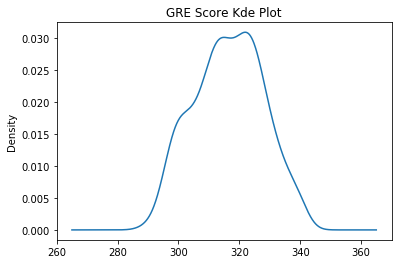

In [12]:
df['GRE Score'].plot(kind='kde', title="GRE Score Kde Plot")
plt.show()

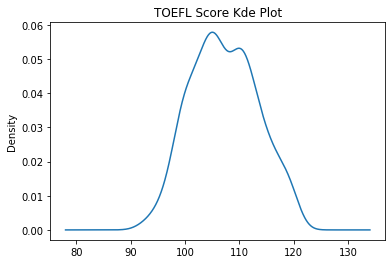

In [13]:
df['TOEFL Score'].plot(kind='kde', title="TOEFL Score Kde Plot")
plt.show()

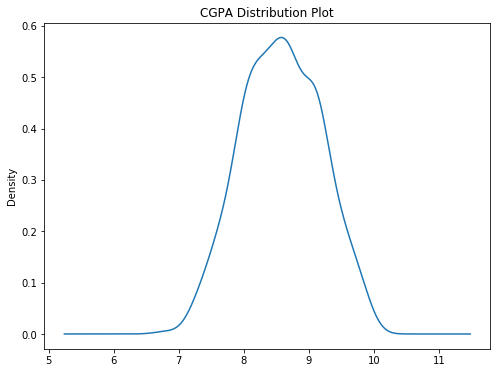

In [14]:
df.CGPA.plot(kind="kde", figsize=(8,6), title="CGPA Distribution Plot")
plt.show()

In [17]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
df.columns = df.columns.str.replace(' ','')

In [19]:
df.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit'],
      dtype='object')

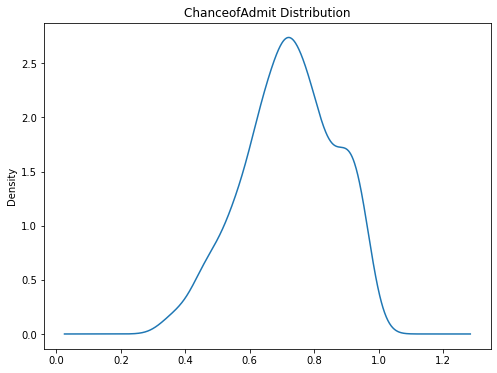

In [20]:
df.ChanceofAdmit.plot(kind='kde',figsize=(8,6), title="ChanceofAdmit Distribution")
plt.show()

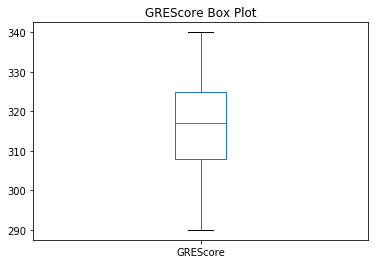

In [22]:
df['GREScore'].plot(kind='box', title="GREScore Box Plot")
plt.show()

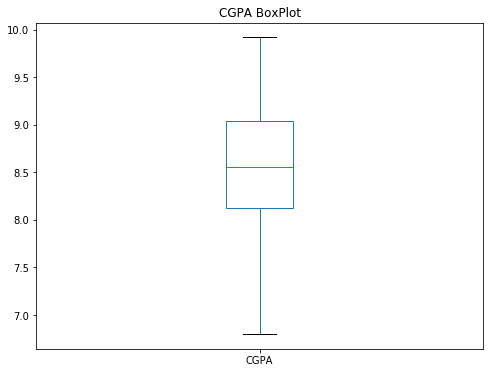

In [23]:
df.CGPA.plot(kind="box", figsize=(8,6), title="CGPA BoxPlot")
plt.show()

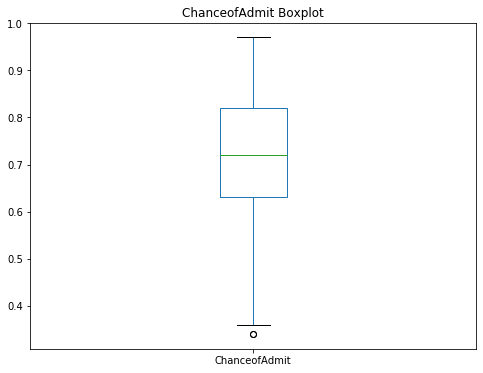

In [24]:
df.ChanceofAdmit.plot(kind='box',figsize=(8,6), title="ChanceofAdmit Boxplot")
plt.show()

In [26]:
print("Minimum GREScore : ", df['GREScore'].min())
print("Maximum GREScore : ", df['GREScore'].max())
print("Average GREScore : ", df['GREScore'].mean())
print("Std GREScore : ", df['GREScore'].std())

Minimum GREScore :  290
Maximum GREScore :  340
Average GREScore :  316.472
Std GREScore :  11.295148372354694


In [42]:
corr_matrix = df[df.columns].corr()
corr_matrix

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceofAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


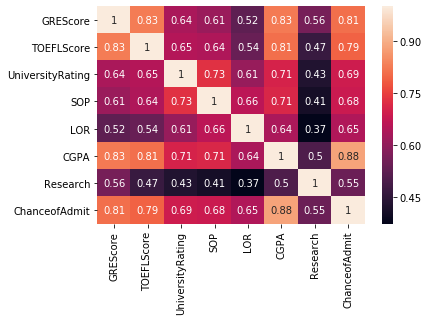

In [43]:
sns.heatmap(corr_matrix, annot= True)
plt.show()

From this we can say that Chance of Admission is highly correlated with CGPA

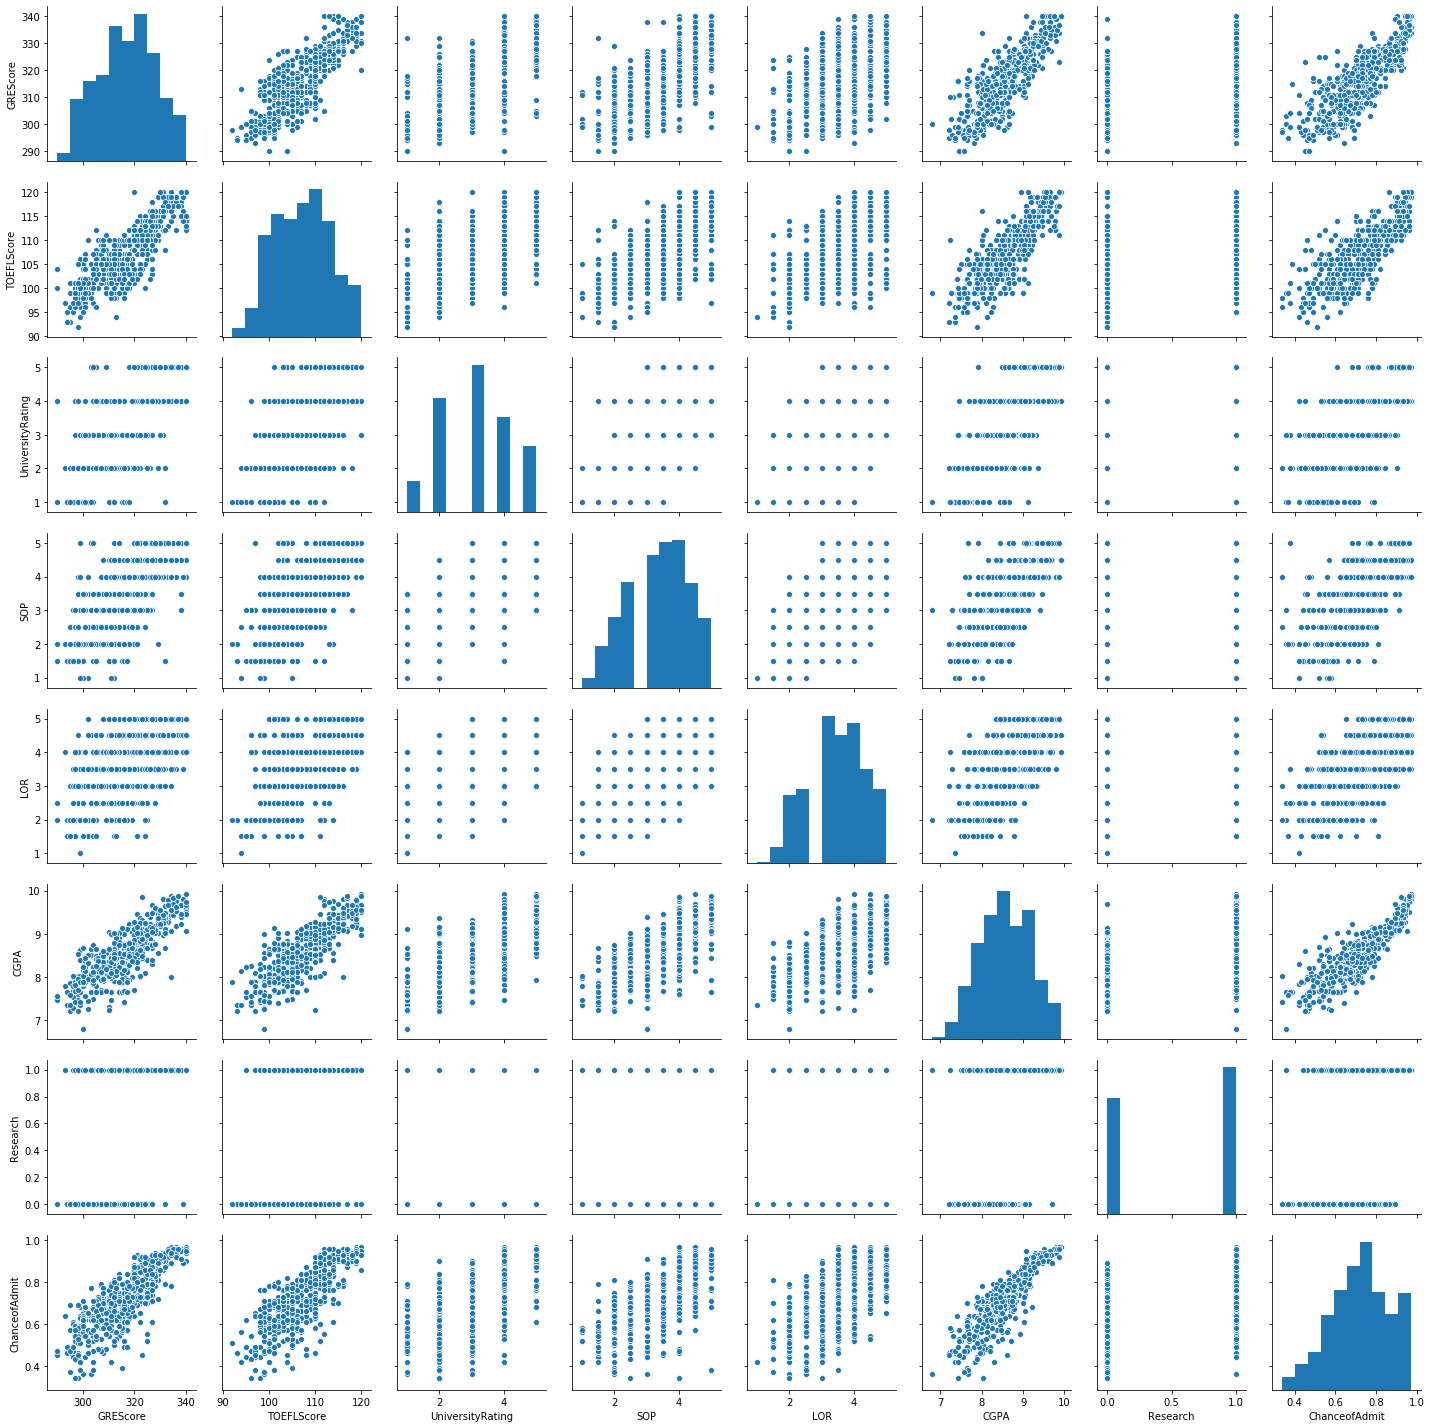

In [37]:
sns.pairplot(df)

From above plots we can say that chance of getting admission is positively correlated with GREScore, TOEFLScore, CGPA.  But it highly positively correlated with CGPA.

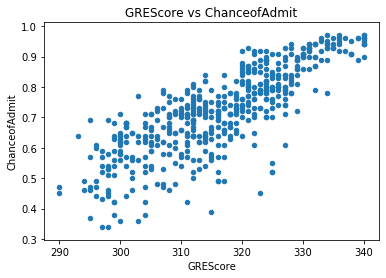

In [44]:
df.plot(kind="scatter", x='GREScore', y = 'ChanceofAdmit', title="GREScore vs ChanceofAdmit")
plt.show()

From above scatter plot it can be seen that chance of getting admission is positively correlated with GREScore.

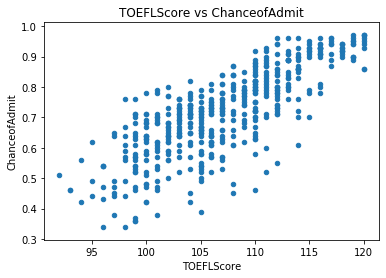

In [45]:
df.plot(kind="scatter", x='TOEFLScore', y = 'ChanceofAdmit' , title="TOEFLScore vs ChanceofAdmit")
plt.show()

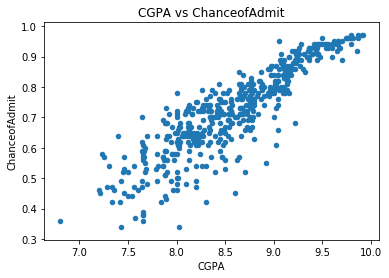

In [46]:
df.plot(kind="scatter", x='CGPA', y = 'ChanceofAdmit', title="CGPA vs ChanceofAdmit")
plt.show()

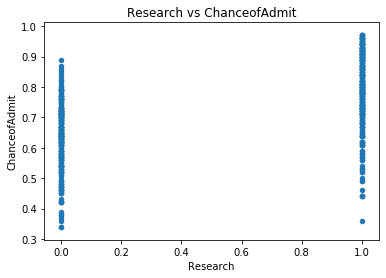

In [47]:
df.plot(kind="scatter", x='Research', y = 'ChanceofAdmit', title="Research vs ChanceofAdmit")
plt.show()

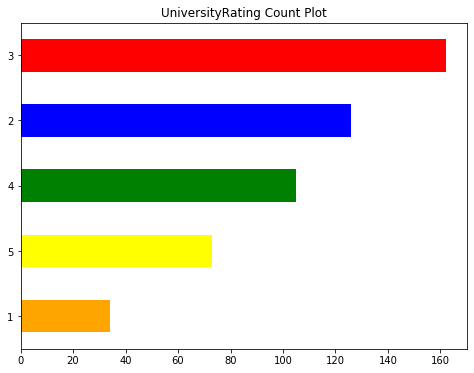

In [49]:
df['UniversityRating'].value_counts().sort_values().plot(kind='barh',figsize=(8,6),
                                            title="UniversityRating Count Plot",
                                                          color=["orange","yellow","green","blue","red"])
plt.show()

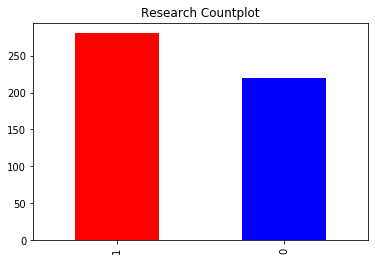

In [50]:
df.Research.value_counts().plot(kind='bar',title="Research Countplot",color=["red","blue"])
plt.show()

# Fitting Machine Learning Model- Linear Regression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.iloc[:,:-1]
X

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [55]:
y = df.iloc[:,-1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
       ... 
470    0.87
471    0.64
472    0.90
473    0.67
474    0.67
475    0.59
476    0.62
477    0.65
478    0.71
479    0.79
480    0.80
481    0.78
482    0.83
483    0.71
484    0.73
485    0.70
486    0.68
487    0.79
488    0.76
489    0.65
490    0.67
491    0.54
492    0.53
493    0.62
494    0.68
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: ChanceofAdmit, Length: 500, dtype: float64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [57]:
X_train

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
56,316,102,3,2.0,3.0,7.40,0
301,319,108,2,2.5,3.0,8.76,0
229,324,111,4,3.0,3.0,9.01,1
331,311,105,2,3.0,2.0,8.12,1
132,309,105,5,3.5,3.5,8.56,0


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [61]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.57660363,  1.42427137,  0.7754586 ,  0.63397891,  0.02173015,
         1.59721688,  0.89543386],
       [-0.24896144,  0.10930646,  0.7754586 ,  1.14116204,  0.56498381,
         0.76468267,  0.89543386],
       [-0.15768318, -0.38380538, -0.97205374, -1.39475361, -1.06477718,
        -1.54976243, -1.11677706],
       [-0.43151794,  0.27367707, -0.09829757, -0.38038735, -0.52152352,
         0.18190872, -1.11677706],
       [ 0.8463776 ,  0.76678891, -0.09829757,  0.12679578, -0.52152352,
         0.78133336,  0.89543386],
       [ 1.12021236,  0.6024183 ,  0.7754586 ,  1.14116204,  0.56498381,
         1.08104567,  0.89543386],
       [-2.43963951, -1.20565845, -1.8458099 , -1.90193674, -1.60803084,
        -1.69961859, -1.11677706],
       [-1.43557873, -0.21943477,  0.7754586 , -0.88757048, -0.52152352,
        -0.18440633, -1.11677706],
       [ 0.11615158,  0.27367707, -0.09829757,  0.12679578,  0.56498381,
         1.06439499,  0.89543386],
       [ 0.29870808,  0.7667

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()

In [65]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
y_pred = lr.predict(X_test)

In [67]:
r2_score(y_test, y_pred)

0.8188432567829629

In [70]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.0608658804157831


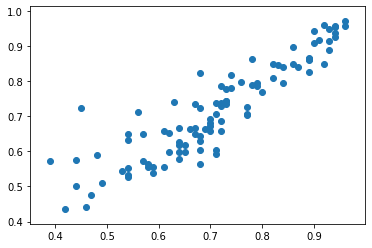

In [72]:
plt.scatter(y_test,y_pred)

The accuracy of the model is 81.88%